# Expected Score Notebook
## Author: Robert 
## Date: January 4, 2021

Purpose of this notebook is to look at the expected score of a turn based on the Score the player is rolling till

In [21]:
## library imports

import pandas as pd ## data manipulation
import matplotlib.pyplot as plt ## for results plotting
from collections import defaultdict ## for resultstoring
from dice import ScoreBasedPlayer ## dice library


In [19]:
scores_to_check = [50*i for i in range(1,20)] ## scores to loop through
turns  = 10000 ## number of rolls to make 
expected_scores = defaultdict(float) ## for storing results

In [38]:
## loop through each score of interest 

for score in scores_to_check:
    player = ScoreBasedPlayer(score,isin=True) ## create a player who will try and roll till the score of interest
    for _ in range(turns): ## play turns number of turns 
        player.turn() ## play a turn 
    expected_scores[score] = (player.get_stats().TurnScores.mean(),player.get_stats().RollsTaken.mean()) ## calculate expected score 
    
expected_scores

defaultdict(float,
            {50: (84.55, 1.0),
             100: (102.35, 1.2251),
             150: (123.04, 1.5585),
             200: (136.665, 1.8136),
             250: (138.715, 2.0507),
             300: (144.375, 2.2399),
             350: (145.69, 2.4147),
             400: (139.985, 2.5301),
             450: (140.055, 2.6736),
             500: (135.375, 2.7774),
             550: (131.15, 2.8669),
             600: (123.72, 2.9572),
             650: (120.9, 3.0387),
             700: (114.72, 3.068),
             750: (103.795, 3.1228),
             800: (99.885, 3.1951),
             850: (93.385, 3.2425),
             900: (90.845, 3.2694),
             950: (83.03, 3.2734)})

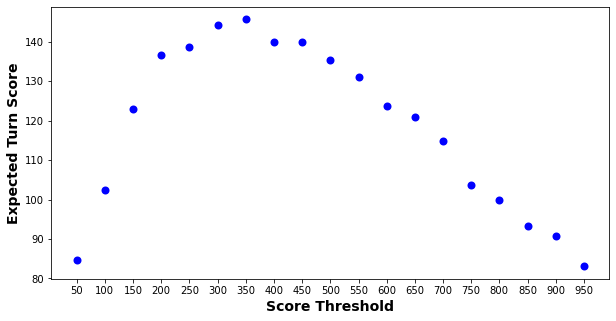

In [39]:
fig,ax = plt.subplots(1,figsize=(10,5))
ax.scatter(expected_scores.keys(),[value[0] for value in expected_scores.values()],color="blue",linewidth=2)
ax.set_xlabel("Score Threshold",fontweight='bold',fontsize=14)
ax.set_ylabel("Expected Turn Score",fontweight='bold',fontsize=14)
ax.set_xticks(range(50,1000,50))
plt.savefig("TurnExpectedScore.png")
plt.show()